===== MENU XỬ LÝ ẢNH =====
T - Tịnh tiến
X - Xoay
P - Phóng to
H - Thu nhỏ
C - Hiển thị tọa độ ảnh
Chọn ảnh (pagoda, quang_ninh):


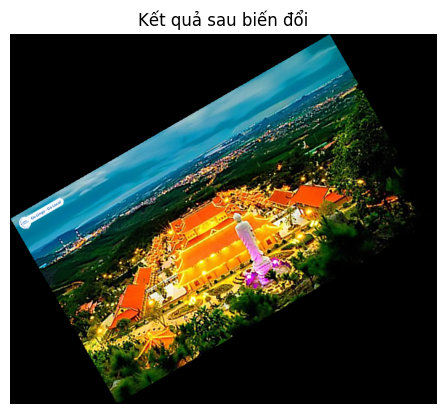

In [1]:
import numpy as np
import imageio.v2 as iio
import scipy.ndimage as nd
import matplotlib.pyplot as plt
import os
import sys

def show_menu():
    print("===== MENU XỬ LÝ ẢNH =====")
    print("T - Tịnh tiến")
    print("X - Xoay")
    print("P - Phóng to")
    print("H - Thu nhỏ")
    print("C - Hiển thị tọa độ ảnh")
    print("==========================")

def get_image():
    print("Chọn ảnh (pagoda, quang_ninh):")
    choice = input(">> ").strip()
    filename = f"exercise/{choice}.jpg"
    
    if not os.path.exists(filename):
        print(f"Ảnh không tồn tại: {filename}")
        return None
    
    try:
        img = iio.imread(filename)
        if img.ndim == 2:
            img = np.stack([img]*3, axis=-1)
        return img
    except Exception as e:
        print("Không thể đọc ảnh:", e)
        return None


def translate(img):
    tx = int(input("Nhập độ tịnh tiến theo trục X: "))
    ty = int(input("Nhập độ tịnh tiến theo trục Y: "))
    return nd.shift(img, shift=(ty, tx, 0))

def rotate(img):
    angle = float(input("Nhập góc xoay (độ): "))
    return nd.rotate(img, angle, reshape=True)

def zoom_in(img):
    scale = float(input("Nhập hệ số phóng to (ví dụ 1.5, 2): "))
    return nd.zoom(img, (scale, scale, 1))

def zoom_out(img):
    scale = float(input("Nhập hệ số thu nhỏ (ví dụ 0.5): "))
    return nd.zoom(img, (scale, scale, 1))

def show_coordinate_map(img):
    plt.imshow(img)
    plt.title("Hiển thị ảnh với tọa độ")
    plt.grid(True)
    plt.show()

def main():
    show_menu()
    choice = input("Chọn phép biến đổi (T/X/P/H/C): ").strip().upper()

    img = get_image()
    if img is None:
        print("Dừng chương trình vì ảnh không hợp lệ.")
        sys.exit()

    result = None
    try:
        if choice == 'T':
            result = translate(img)
        elif choice == 'X':
            result = rotate(img)
        elif choice == 'P':
            result = zoom_in(img)
        elif choice == 'H':
            result = zoom_out(img)
        elif choice == 'C':
            show_coordinate_map(img)
            return
        else:
            print("Lựa chọn không hợp lệ.")
            return
    except Exception as e:
        print("Đã xảy ra lỗi trong quá trình xử lý ảnh:", e)
        return

    if result is not None:
        plt.imshow(result.astype(np.uint8))
        plt.axis('off')
        plt.title("Kết quả sau biến đổi")
        plt.show()

if __name__ == "__main__":
    main()
